In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import math

In [9]:
%matplotlib inline
def gradient_descent(x,y, rate, iterations):
    m_curr = b_curr = 0
    n = len(x)
    plt.scatter(x,y,color='red',marker='+')
    cost_previous = 0
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
#       print (m_curr,b_curr, i)
        plt.plot(x,y_predicted,color='green')
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * bd
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost
#        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))
    plt.show()
    return  m_curr, b_curr


    

In [11]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

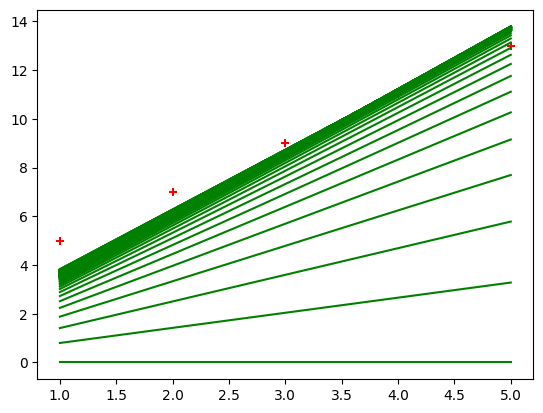

(np.float64(2.4484684018774328), np.float64(1.3808867709499106))

In [13]:
gradient_descent(x,y, 0.01, 100)

In [7]:
test_scores_df = pd.read_csv('data/test-scores-1.csv')
test_scores_df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


Using sklearn: Coef [1.01773624] Intercept 1.9152193111568891


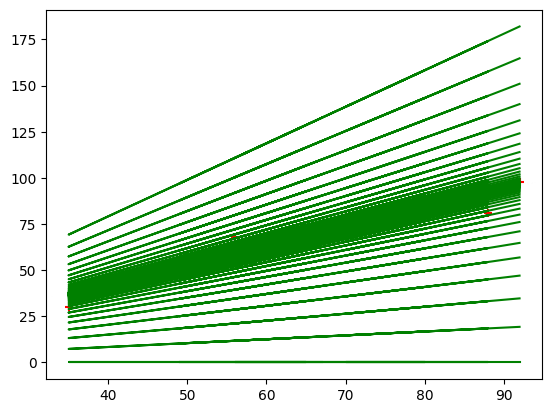

Using gradient descent function: Coef 1.0177381667350405 Intercept 1.9150826165722297


In [15]:
r = LinearRegression()
r.fit(test_scores_df[['math']], test_scores_df.cs)
print("Using sklearn: Coef {} Intercept {}".format(r.coef_,r.intercept_))

x2 = np.array(test_scores_df.math)
y2 = np.array(test_scores_df.cs)
m,b = gradient_descent(x2, y2, 0.0002, 1000000)
print("Using gradient descent function: Coef {} Intercept {}".format(m, b))